In [1]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
# Reading the csv file
df=pd.read_csv('airlines_reviews.csv')

In [3]:
# Displaying first 5 rows of the dataset
df.head()

Title              Name Review Date  \
0                    Flight was amazing  Alison Soetantyo  2024-03-01   
1  seats on this aircraft are dreadful      Robert Watson  2024-02-21   
2          Food was plentiful and tasty             S Han  2024-02-20   
3          “how much food was available          D Laynes  2024-02-19   
4       “service was consistently good”         A Othman   2024-02-19   

              Airline Verified  \
0  Singapore Airlines     True   
1  Singapore Airlines     True   
2  Singapore Airlines     True   
3  Singapore Airlines     True   
4  Singapore Airlines     True   

                                             Reviews Type of Traveller  \
0    Flight was amazing. The crew onboard this fl...      Solo Leisure   
1    Booking an emergency exit seat still meant h...      Solo Leisure   
2    Excellent performance on all fronts. I would...    Family Leisure   
3   Pretty comfortable flight considering I was f...      Solo Leisure   
4   The service was consistently good from start ...    Family Leisure   

     Month Flown                         Route           Class  Seat Comfort  \
0  December 2023          Jakarta to Singapore  Business Class             4   
1  February 2024           Phuket to Singapore   Economy Class             5   
2  February 2024        Siem Reap to Singapore   Economy Class             1   
3  February 2024  Singapore to London Heathrow   Economy Class             5   
4  February 2024       Singapore to Phnom Penh   Economy Class             5   

   Staff Service  Food & Beverages  Inflight Entertainment  Value For Money  \
0              4                 4                       4                4   
1              3                 4                       4                1   
2              5                 2                       1                5   
3              5                 5                       5                5   
4              5                 5                       5                5   

   Overall Rating Recommended  
0               9         yes  
1               3          no  
2              10         yes  
3              10         yes  
4              10         yes

In [4]:
# Displaying the shape of the dataset
df.shape

(8100, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [6]:
df.describe()

Seat Comfort  Staff Service  Food & Beverages  Inflight Entertainment  \
count   8100.000000    8100.000000       8100.000000             8100.000000   
mean       3.414815       3.569877          3.384074                3.636790   
std        1.397183       1.527436          1.455694                1.309564   
min        1.000000       1.000000          1.000000                0.000000   
25%        2.000000       2.000000          2.000000                3.000000   
50%        4.000000       4.000000          4.000000                4.000000   
75%        5.000000       5.000000          5.000000                5.000000   
max        5.000000       5.000000          5.000000                5.000000   

       Value For Money  Overall Rating  
count      8100.000000     8100.000000  
mean          3.148642        5.632469  
std           1.589377        3.523664  
min           1.000000        1.000000  
25%           1.000000        2.000000  
50%           3.000000        6.000000  
75%           5.000000        9.000000  
max           5.000000       10.000000

In [7]:
df.columns

Index(['Title', 'Name', 'Review Date', 'Airline', 'Verified', 'Reviews',
       'Type of Traveller', 'Month Flown', 'Route', 'Class', 'Seat Comfort',
       'Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Value For Money', 'Overall Rating', 'Recommended'],
      dtype='object')

In [8]:
df.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

In [9]:
unique_airlines = df['Airline'].unique()
print(unique_airlines)

['Singapore Airlines' 'Qatar Airways' 'All Nippon Airways' 'Emirates'
 'Japan Airlines' 'Turkish Airlines' 'Air France' 'Cathay Pacific Airways'
 'EVA Air' 'Korean Air']


In [ ]:
unique_type_traveller= df['Type of Traveller'].unique()
print(unique_type_traveller)

['Solo Leisure' 'Family Leisure' 'Business' 'Couple Leisure']


In [12]:
# Get unique values of 'Moth Flown' without the year
unique_month_flown = df['Month Flown'].str.split(' ').str[0].unique()
print(unique_month_flown)

['December' 'February' 'January' 'November' 'September' 'October' 'May'
 'August' 'June' 'April' 'July' 'March']


In [13]:
unique_class= df['Class'].unique()
print(unique_class)

['Business Class' 'Economy Class' 'Premium Economy' 'First Class']


In [66]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [67]:
# Function for text cleaning and preprocessing
def preprocess_text(text):

    # Remove punctuation and special characters
    text = str.translate(text, str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to a single string
    return ' '.join(tokens)

In [68]:
# Apply preprocessing to the 'Reviews' column
df['Cleaned_Reviews'] = df['Reviews'].apply(preprocess_text)


In [69]:
# Preview the cleaned data
df[['Reviews', 'Cleaned_Reviews']]

Reviews  \
0       Flight was amazing. The crew onboard this fl...   
1       Booking an emergency exit seat still meant h...   
2       Excellent performance on all fronts. I would...   
3      Pretty comfortable flight considering I was f...   
4      The service was consistently good from start ...   
...                                                 ...   
8095    KE124, Brisbane to Incheon (A330) and KE867,...   
8096    Our recent flight was our fourth trip to the...   
8097    I flew Korean Air from Bali to Seoul in Pres...   
8098    Seoul to Paris with Korean Air. I am traveli...   
8099    The 13 hour flight in Business class from Se...   

                                        Cleaned_Reviews  
0     Flight amazing The crew onboard flight welcomi...  
1     Booking emergency exit seat still meant huge d...  
2     Excellent performance front I would definitely...  
3     Pretty comfortable flight considering I flying...  
4     The service consistently good start finish The...  
...                                                 ...  
8095  KE Brisbane Incheon A KE Incheon Ulaanbaatar A...  
8096  Our recent flight fourth trip UK year Sydney L...  
8097  I flew Korean Air Bali Seoul Prestige Class Bu...  
8098  Seoul Paris Korean Air I traveling triathlon b...  
8099  The hour flight Business class Seoul Toronto o...  

[8100 rows x 2 columns]

In [70]:
# Feature Engineering

In [71]:
# Convert 'Review Date' to datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'])


In [72]:
# Extracting date features
df['Year Flown'] = df['Review Date'].dt.year
df['Month Flown'] = df['Review Date'].dt.month
df['Day '] = df['Review Date'].dt.day
df['Day of Week'] = df['Review Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Week of Year'] = df['Review Date'].dt.isocalendar().week  # Week of year

In [73]:
# Length of review text
df['Review_Length'] = df['Cleaned_Reviews'].apply(len)
df['Review_Length']

0       330
1       193
2       144
3       691
4       213
       ... 
8095    491
8096    789
8097    733
8098    868
8099    211
Name: Review_Length, Length: 8100, dtype: int64

In [74]:
# Word count in the review
df['Word_Count'] = df['Cleaned_Reviews'].apply(lambda x: len(x.split()))
df['Word_Count']

0        53
1        28
2        18
3        98
4        32
       ... 
8095     76
8096    115
8097    115
8098    127
8099     30
Name: Word_Count, Length: 8100, dtype: int64

In [75]:
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   8100 non-null   object        
 1   Name                    8100 non-null   object        
 2   Review Date             8100 non-null   datetime64[ns]
 3   Airline                 8100 non-null   object        
 4   Verified                8100 non-null   object        
 5   Reviews                 8100 non-null   object        
 6   Type of Traveller       8100 non-null   object        
 7   Month Flown             8100 non-null   int64         
 8   Route                   8100 non-null   object        
 9   Class                   8100 non-null   object        
 10  Seat Comfort            8100 non-null   int64         
 11  Staff Service           8100 non-null   int64         
 12  Food & Beverages        8100 non-null   int64   

In [77]:
df.columns

Index(['Title', 'Name', 'Review Date', 'Airline', 'Verified', 'Reviews',
       'Type of Traveller', 'Month Flown', 'Route', 'Class', 'Seat Comfort',
       'Staff Service', 'Food & Beverages', 'Inflight Entertainment',
       'Value For Money', 'Overall Rating', 'Recommended', 'Cleaned_Reviews',
       'Year Flown', 'Day ', 'Day of Week', 'Week of Year', 'Review_Length',
       'Word_Count'],
      dtype='object')

In [78]:
# Dropping columns that are not necessary

In [79]:
df.drop(['Review Date', 'Title','Name','Route'], axis=1, inplace=True)

In [80]:
# One-hot Encoding

In [81]:
columns_categorical = df.select_dtypes(include=['object']).columns
columns_numerical = ['Review_Length', 'Word_Count','Year Flown','Month Flown','Day ','Day of Week','Week of Year']


In [82]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


columns_categorical = df.select_dtypes(include=['object']).columns
# Exclude 'Cleaned_Reviews' from categorical columns
columns_categorical = columns_categorical[columns_categorical != 'Cleaned_Reviews']
columns_numerical = ['Review_Length', 'Word_Count','Year Flown','Month Flown','Day ','Day of Week','Week of Year']



In [83]:

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
for column in columns_categorical:
    encoded_data = onehot_encoder.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out([column]))
    df = pd.concat([df, encoded_df], axis=1)

# Dropping categorical columns, excluding 'Cleaned_Reviews'
df.drop(columns_categorical, axis=1, inplace=True)


In [84]:
# 1. Sentiment Analysis DataFrame
sentiment_df = df[['Overall Rating', 'Cleaned_Reviews']]

# 2. Prediction DataFrame (all other columns except 'Cleaned_Review')
prediction_df = df.drop(['Cleaned_Reviews'], axis=1)

# Display the first few rows of both DataFrames
print("Sentiment Analysis DataFrame:")
print(sentiment_df.head())

print("\nPrediction DataFrame:")
print(prediction_df.head())


Sentiment Analysis DataFrame:
   Overall Rating                                    Cleaned_Reviews
0               9  Flight amazing The crew onboard flight welcomi...
1               3  Booking emergency exit seat still meant huge d...
2              10  Excellent performance front I would definitely...
3              10  Pretty comfortable flight considering I flying...
4              10  The service consistently good start finish The...

Prediction DataFrame:
   Month Flown  Seat Comfort  Staff Service  Food & Beverages  \
0            3             4              4                 4   
1            2             5              3                 4   
2            2             1              5                 2   
3            2             5              5                 5   
4            2             5              5                 5   

   Inflight Entertainment  Value For Money  Overall Rating  Recommended  \
0                       4                4               9         

# Visualizations

In [86]:
from wordcloud import WordCloud
import plotly.express as px
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns


### Histograms

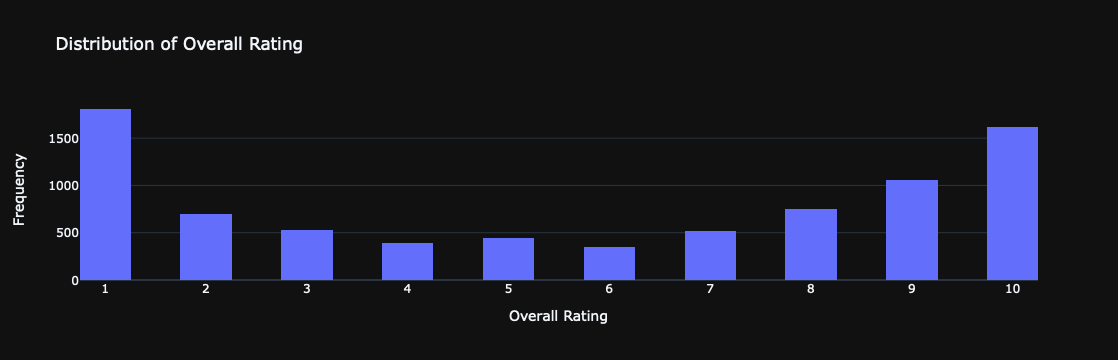

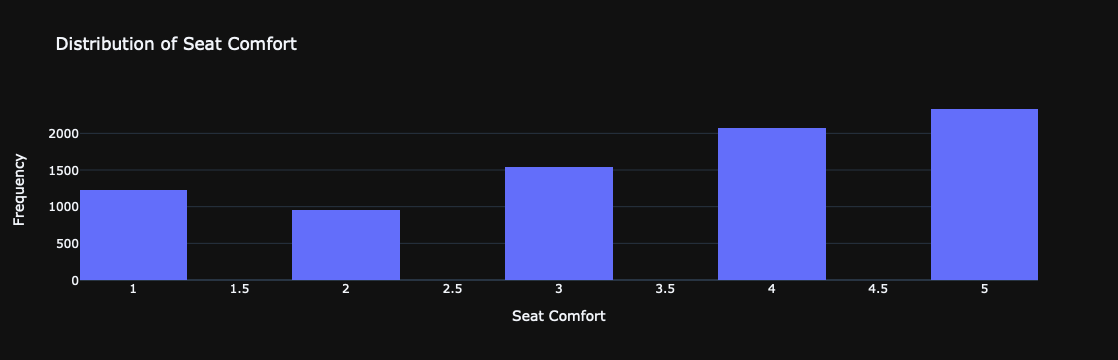

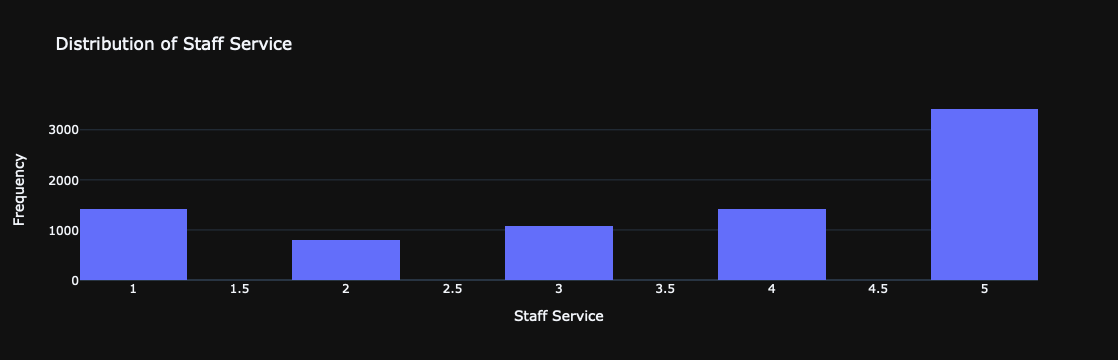

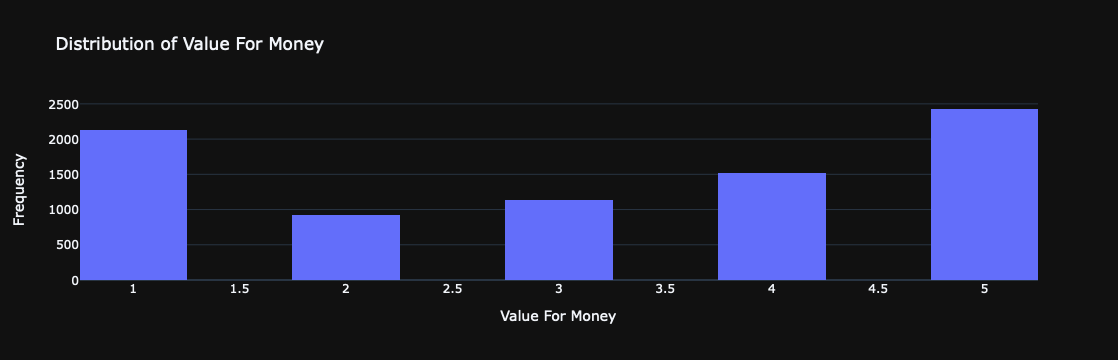

In [88]:
import plotly.express as px

# histograms for numerical features
def plot_histograms_plotly(df, numerical_columns):
    for col in numerical_columns:
        fig = px.histogram(df, x=col, nbins=20, title=f'Distribution of {col}')
        fig.update_layout(
            xaxis_title=col,
            yaxis_title="Frequency",
            template='plotly_dark'
        )
        fig.show()

# function call
numerical_columns = ['Overall Rating','Seat Comfort', 'Staff Service', 'Value For Money'] # removing'Review_Length', 'Word_Count', as they are continuous features
plot_histograms_plotly(df, numerical_columns)


### Bar plots

In [90]:
# for visulaizations : copy of the original dataframe before dropping columns
df_original = pd.read_csv('airlines_reviews.csv')

columns_categorical_original = df_original.select_dtypes(include=['object']).columns

In [91]:
import plotly.express as px

def plot_categorical_bar(df_original, columns_categorical_original):
    # Plot the distribution of categorical features in the original dataframe
    for column in columns_categorical_original:
        fig = px.bar(df_original[column].value_counts().reset_index(), x='index', y=column, 
                     labels={'index': column, column: 'Count'}, 
                     title=f'Distribution of {column}')
        fig.show()

# function call
plot_categorical_bar(df_original,['Airline','Type of Traveller','Month Flown','Class','Recommended'])


### BoxPlots

In [93]:
def plot_box_plot(df_original, columns_numerical):
    # box plots for numerical features
    for column in columns_numerical:
        fig = px.box(df_original, y=column, title=f'Box Plot of {column}')
        fig.show()

# function call
plot_box_plot(df, columns_numerical)


### Heatmap

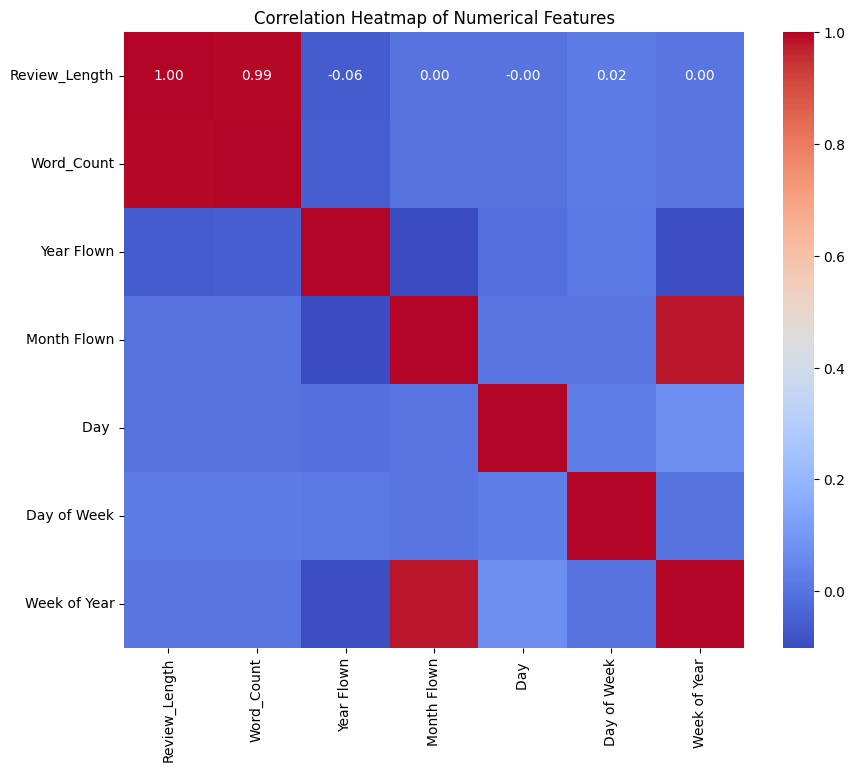

In [95]:
def plot_correlation_heatmap(df_original, columns_numerical):
    correlation_matrix = df_original[columns_numerical].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

# function call
plot_correlation_heatmap(df, columns_numerical)


### WordCloud

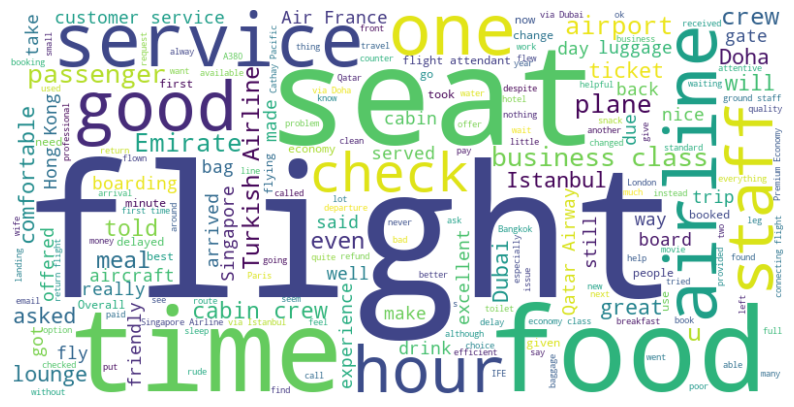

In [110]:
#For the reviews before cleaning them
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = ' '.join(df_original['Reviews'])

# Generating the colud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Displaying it
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


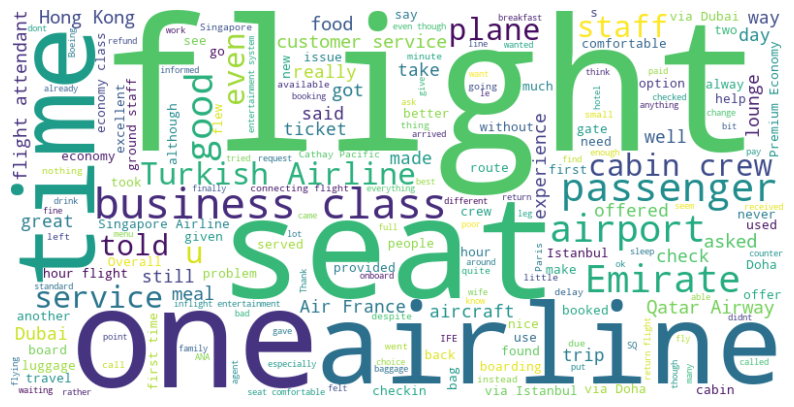

In [106]:
#For the reviews after cleaning them
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews = ' '.join(sentiment_df['Cleaned_Reviews'])

# Generating the colud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Displaying it
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Bi-grams

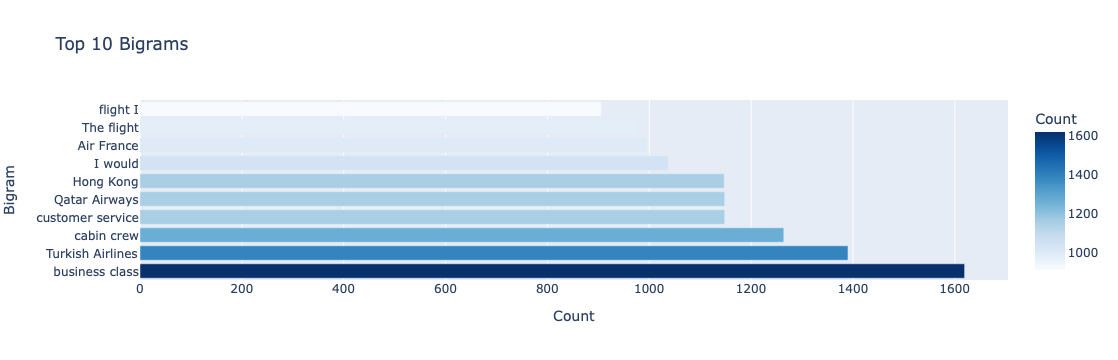

In [115]:
import plotly.express as px
from nltk.util import ngrams
from collections import Counter

# Tokenizing cleaned reviews
all_reviews_tokens = ' '.join(df['Cleaned_Reviews']).split()

# Creating the bigrams
bigrams = ngrams(all_reviews_tokens, 2)
bigram_freq = Counter(bigrams)

# saving the top 10 bigrams in a variable
common_bigrams = bigram_freq.most_common(10)

bigram_labels = [' '.join(bigram) for bigram, _ in common_bigrams]
bigram_counts = [count for _, count in common_bigrams]

# making a dataframe with bigrams
bigram_df = pd.DataFrame({
    'Bigram': bigram_labels,
    'Frequency': bigram_counts
})

# bar chart using plotly
fig = px.bar(bigram_df, x='Frequency', y='Bigram', orientation='h',
             title='Top 10 Bigrams', labels={'Frequency': 'Count', 'Bigram': 'Bigram'},
             color='Frequency', color_continuous_scale='Blues')

fig.show()


### Trigrams:

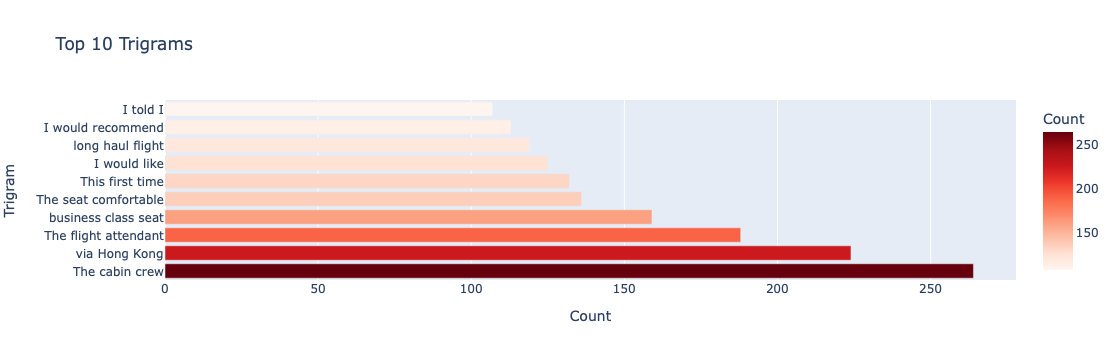

In [117]:
trigrams = ngrams(all_reviews_tokens, 3)
trigram_freq = Counter(trigrams)

# saving the top 10 in a variable
common_trigrams = trigram_freq.most_common(10)

trigram_labels = [' '.join(trigram) for trigram, _ in common_trigrams]
trigram_counts = [count for _, count in common_trigrams]

# making a dataframe with bigrams
trigram_df = pd.DataFrame({
    'Trigram': trigram_labels,
    'Frequency': trigram_counts
})

# bar chart
fig = px.bar(trigram_df, x='Frequency', y='Trigram', orientation='h',
             title='Top 10 Trigrams', labels={'Frequency': 'Count', 'Trigram': 'Trigram'},
             color='Frequency', color_continuous_scale='Reds')

fig.show()


#### Distribution of sentiment on the whole

In [103]:
from textblob import TextBlob

def plot_sentiment(df, column):
    # Applying sentiment analysis with TextBlob
    df['Sentiment'] = df[column].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    # Classify as positive, neutral, or negative based on sentiment polarity
    df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
    
    # plottingsentiment distribution
    sentiment_count = df['Sentiment_Label'].value_counts().reset_index()
    sentiment_count.columns = ['Sentiment', 'Count']
    fig = px.bar(sentiment_count, x='Sentiment', y='Count', title='Sentiment Distribution')
    fig.show()

# function call
plot_sentiment(df_original, 'Reviews')


#### Top 10 terms based on TF-IDF

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def plot_tfidf(df, column):
    # Vectorizinf the reviews using TFIDF
    tfidf = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = tfidf.fit_transform(df[column].dropna())
    feature_names = tfidf.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    
    tfidf_df = pd.DataFrame(list(zip(feature_names, tfidf_scores)), columns=['Term', 'TF-IDF Score'])
    tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)
    
    # the top 10 terms with the highest TF-IDF scores
    fig = px.bar(tfidf_df.head(10), x='Term', y='TF-IDF Score', title='Top 10 Terms Based on TF-IDF')
    fig.show()

# function call
plot_tfidf(df_original, 'Reviews')


### WordCloud based on different sentiments

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pallavisathyanarayana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pallavisathyanarayana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


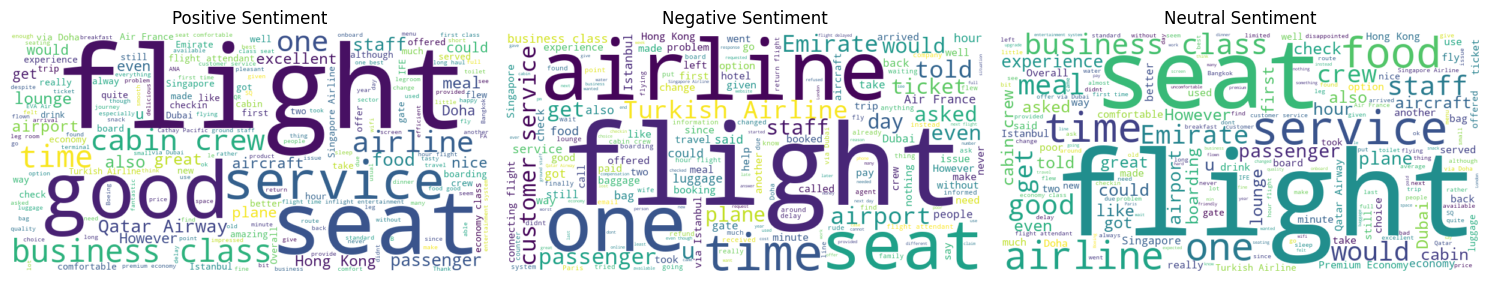

In [130]:
#downloading teh stop words
nltk.download('punkt')
nltk.download('stopwords')

# we are catergorizing the sentiments based on the overall_rating
def sentiment_category(rating):
    if rating >= 7:
        return 'Positive'
    elif rating <= 3:
        return 'Negative'
    else:
        return 'Neutral'

# adding a new cloumn called 'sentiment' tahtw ould strore our sentimnet label
df['Sentiment'] = df['Overall Rating'].apply(sentiment_category)

# wordcloud generation 
def generate_wordcloud(df, sentiment_label):
    text = ' '.join(df[df['Sentiment'] == sentiment_label]['Cleaned_Reviews'])
    
    # remobing stopwords
    stop_words = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)
    
    return wordcloud

# function call for all labels
positive_wordcloud = generate_wordcloud(df, 'Positive')
negative_wordcloud = generate_wordcloud(df, 'Negative')
neutral_wordcloud = generate_wordcloud(df, 'Neutral')

# plots
plt.figure(figsize=(15, 10))

# positive plot
plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

# negative plot
plt.subplot(1, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

# neutral plot
plt.subplot(1, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

# display
plt.tight_layout()
plt.show()
